In [1]:
# Python 2
#from sklearn.externals import joblib
# Python 3
import joblib

from PIL import Image, ImageDraw
from io import BytesIO
import json
import joblib
import os
import random
import torch

import numpy as np
import matplotlib.pyplot as plt

random.seed(25)


ANNOTATION_LT = '/data4/coco_lt/annotations/annotation.json'
ANNOTATION_BL = '/data4/coco_bl/annotations/annotation.json'

In [2]:
lt_annotation = json.load(open(ANNOTATION_LT))
bl_annotation = json.load(open(ANNOTATION_BL))

In [3]:
def show_statistics(vals):
    # sort your values in descending order
    indSort = np.argsort(vals)[::-1]
    # rearrange your data
    att_values = np.array(vals)[indSort]
    indexes = np.arange(len(vals))
    bar_width = 0.35
    plt.bar(indexes, att_values)
    plt.show()

In [4]:
lt_annotation.keys()

dict_keys(['cat2id', 'id2cat', 'key2path', 'train', 'val', 'test_lt', 'test_bl', 'test_bbl'])

In [5]:
def duplication_check(annotation):
    count = 0
    all_img = []
    all_set = ['train', 'val', 'test_lt', 'test_bl', 'test_bbl']
    
    for key in all_set:
        count += len(annotation[key]['label'])
        all_img = all_img + list(annotation[key]['label'].keys())
    
    all_img = set(all_img)
    print('Counting Result: {}'.format(count))
    print('Number of Images: {}'.format(len(all_img)))

In [6]:
duplication_check(lt_annotation)

Counting Result: 164873
Number of Images: 164873


In [7]:
duplication_check(bl_annotation)

Counting Result: 39382
Number of Images: 39382


In [8]:
def count_label_dist(dataset, num_cls=29):
    cls_sizes = [0] * num_cls
    for key, val in dataset['label'].items():
        cls_sizes[int(val)] += 1
    print(len(dataset['label']))
    return cls_sizes

In [9]:
def count_attribuate_dist(dataset, num_cls=204):
    if 'attribute_dist' in dataset:
        att_all = list(dataset['attribute_dist'].values())
        att_all = [torch.FloatTensor(item) for item in att_all]
        att_count = sum(att_all)
        print('std: ', (att_count / att_count.sum()).std().item())
        att_count = att_count.tolist()
        att_count.sort(reverse=True)
        return att_count
    else:
        return [0] * num_cls

144573


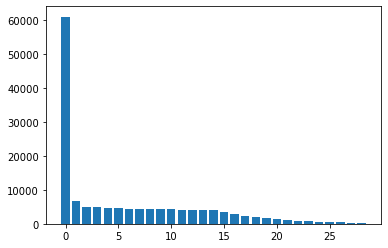

In [10]:
show_statistics(count_label_dist(lt_annotation['train']))

2900


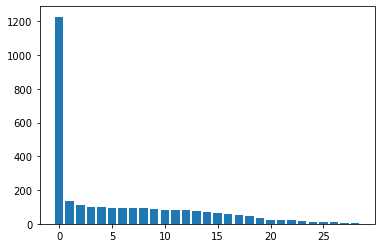

In [11]:
show_statistics(count_label_dist(lt_annotation['val']))

5800


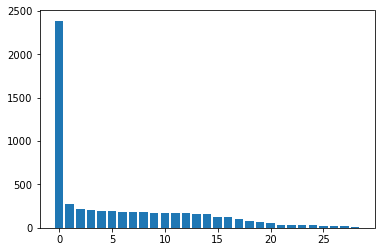

In [12]:
show_statistics(count_label_dist(lt_annotation['test_lt']))

5800


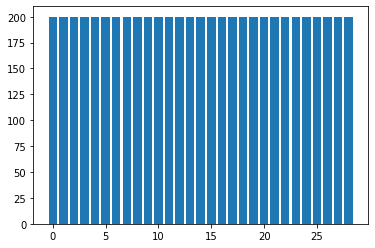

In [13]:
show_statistics(count_label_dist(lt_annotation['test_bl']))

5800


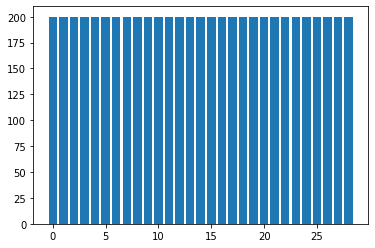

In [14]:
show_statistics(count_label_dist(lt_annotation['test_bbl']))

32132


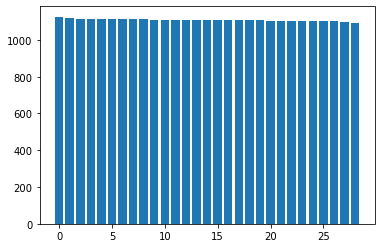

In [15]:
show_statistics(count_label_dist(bl_annotation['train']))

1450


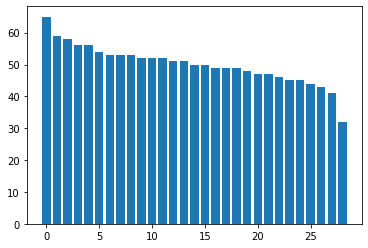

In [16]:
show_statistics(count_label_dist(bl_annotation['val']))

0


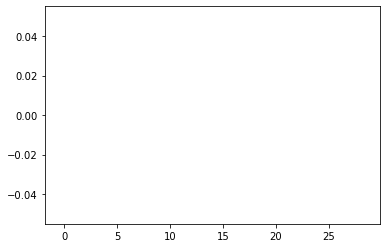

In [17]:
show_statistics(count_label_dist(bl_annotation['test_lt']))

2900


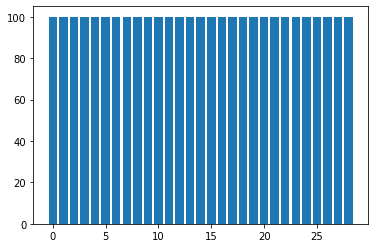

In [18]:
show_statistics(count_label_dist(bl_annotation['test_bl']))

2900


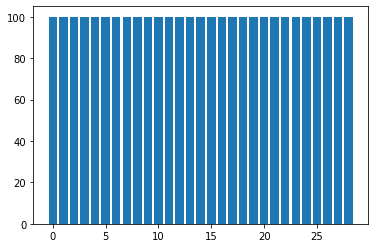

In [19]:
show_statistics(count_label_dist(bl_annotation['test_bbl']))

std:  0.010147176682949066


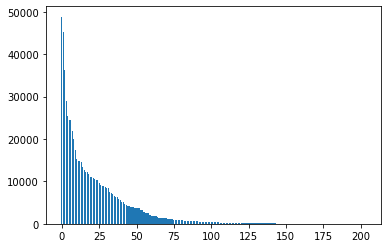

In [20]:
show_statistics(count_attribuate_dist(lt_annotation['train']))

std:  0.0103004714474082


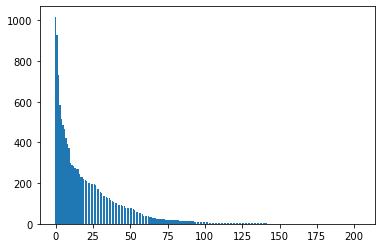

In [21]:
show_statistics(count_attribuate_dist(lt_annotation['val']))

std:  0.010025572031736374


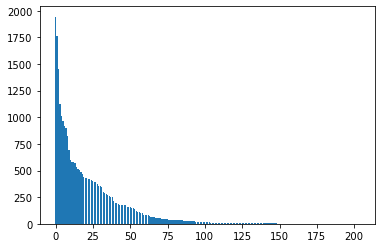

In [22]:
show_statistics(count_attribuate_dist(lt_annotation['test_lt']))

std:  0.012594038620591164


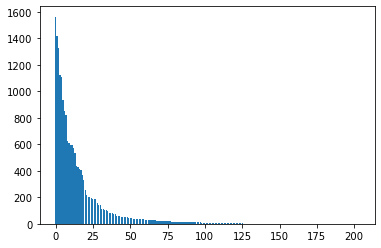

In [23]:
show_statistics(count_attribuate_dist(lt_annotation['test_bl']))

std:  0.007736516650766134


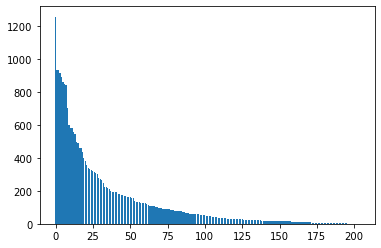

In [24]:
show_statistics(count_attribuate_dist(lt_annotation['test_bbl']))

std:  0.012390590272843838


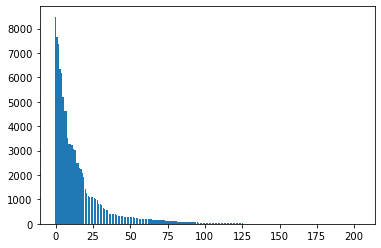

In [25]:
show_statistics(count_attribuate_dist(bl_annotation['train']))

std:  0.012470779940485954


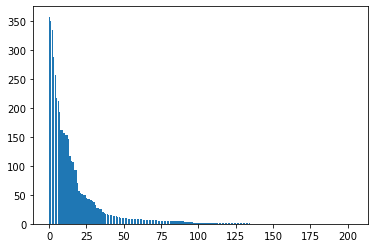

In [26]:
show_statistics(count_attribuate_dist(bl_annotation['val']))

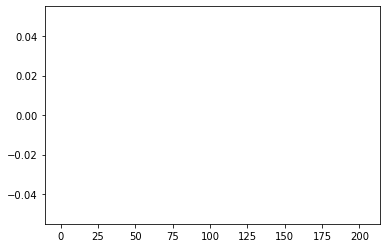

In [27]:
show_statistics(count_attribuate_dist(bl_annotation['test_lt']))

std:  0.012299695052206516


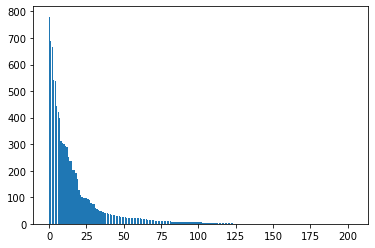

In [28]:
show_statistics(count_attribuate_dist(bl_annotation['test_bl']))

std:  0.006971491035073996


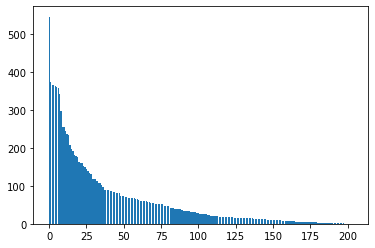

In [29]:
show_statistics(count_attribuate_dist(bl_annotation['test_bbl']))

In [30]:
JBL_LT = './coco_intra_lt_inter_lt.jbl'
JBL_BL = './coco_intra_lt_inter_bl.jbl'
cocottributes_lt = joblib.load(JBL_LT)
cocottributes_bl = joblib.load(JBL_BL)

In [48]:
def print_image_by_index(annotation, cocottributes, setname='train', index=1):
    key = list(annotation[setname]['label'].keys())[index]
    img_path = annotation[setname]['path'][key]
    img = Image.open(img_path)
    
    att_array = cocottributes[setname]['attribute'][key]
    # List of COCO Attributes
    attr_details = sorted(cocottributes['attributes'], key=lambda x:x['id'])
    attr_names = [item['name'] for item in attr_details]
    pos_attrs = [a for ind, a in enumerate(attr_names) if att_array[ind] > 0.5]
    # 
    id2cat = {i:cat for cat,i in cocottributes['cat2id'].items()}
    category = id2cat[annotation[setname]['label'][key]]
    print_image_with_attributes(img, pos_attrs, category)

def print_image_with_attributes(img, attrs, category):

    fig = plt.figure()
    plt.imshow(img)
    plt.axis('off')  # clear x- and y-axes
    plt.title(category)
    for ind, a in enumerate(attrs):
        plt.text(min(img.size[1]+10, 1000), (ind+1)*img.size[1]*0.1, a, ha='left')

In [49]:
ex_inds = [0,10,50,1000,2000,3000,4000,5000]

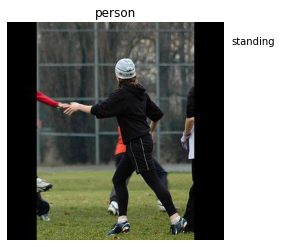

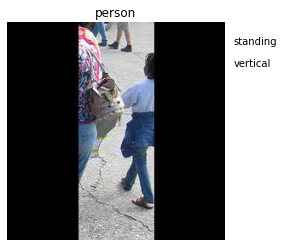

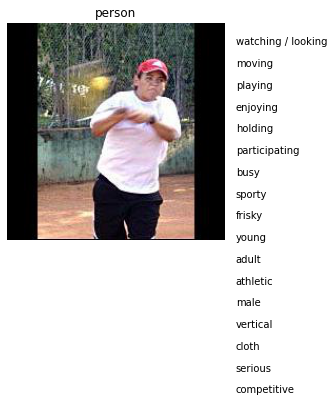

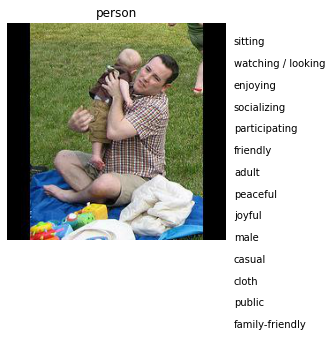

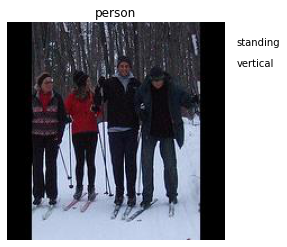

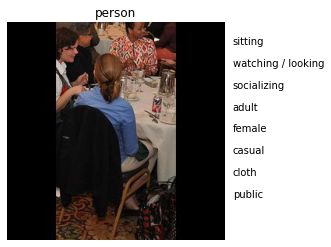

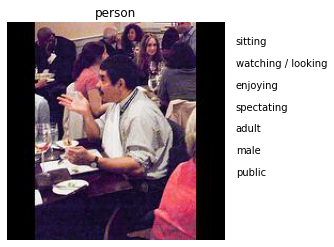

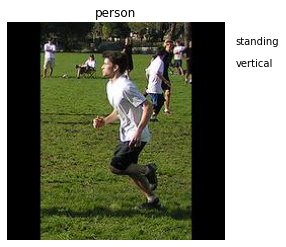

In [50]:
for ex_ind in ex_inds:
    print_image_by_index(lt_annotation, cocottributes_lt, setname='train', index=ex_ind)

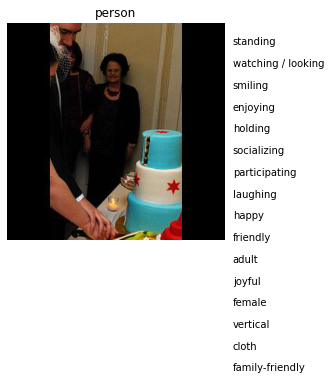

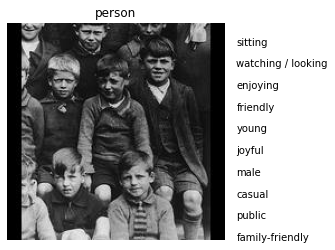

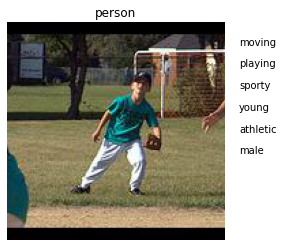

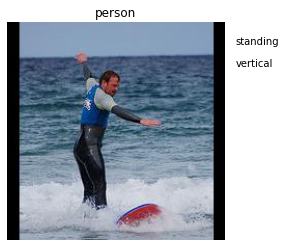

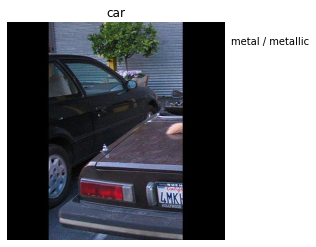

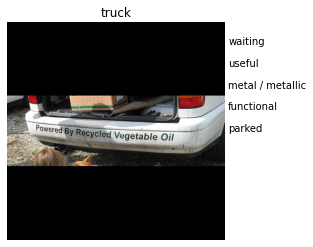

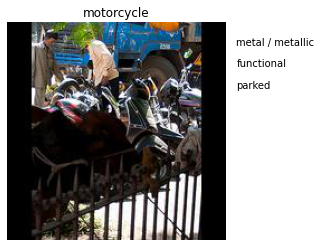

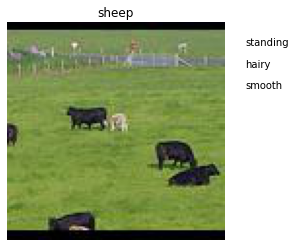

In [51]:
for ex_ind in ex_inds:
    print_image_by_index(bl_annotation, cocottributes_bl, setname='train', index=ex_ind)

In [ ]:
lt_annotation['']